In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
data=load_breast_cancer()

In [3]:
X=data.data
y=data.target
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [5]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

**Pipe-Lining**

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [7]:
pipe_lr=Pipeline([('scl',StandardScaler()),
                 ('pca',PCA(n_components=2)),
                 ('clf',LogisticRegression(random_state=1))])

In [8]:
pipe_lr.fit(X_train,y_train)

C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=1, solver='warn',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [9]:
print('Test Accuracy: %3f' % pipe_lr.score(X_test,y_test))

Test Accuracy: 0.947368


**K-Fold Cross-Validation**

In [10]:
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=10,random_state=1)
#kfolds=kfolds.get_n_splits(X_train,y_train)
print(kfold)
scores=[]
for k,(train,test) in enumerate(kfold.split(X_train,y_train)):
    pipe_lr.fit(X_train[train],y_train[train])
    score=pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)
    print('Fold: %s,Class dist.: %s, Acc: %.3f' %(k+1,np.bincount(y_train[train]),score))

StratifiedKFold(n_splits=10, random_state=1, shuffle=False)
Fold: 1,Class dist.: [153 256], Acc: 0.891
Fold: 2,Class dist.: [153 256], Acc: 0.978
Fold: 3,Class dist.: [153 256], Acc: 0.978
Fold: 4,Class dist.: [153 256], Acc: 0.913
Fold: 5,Class dist.: [153 256], Acc: 0.935
Fold: 6,Class dist.: [153 257], Acc: 0.978
Fold: 7,Class dist.: [153 257], Acc: 0.933

C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\si


Fold: 8,Class dist.: [153 257], Acc: 0.956
Fold: 9,Class dist.: [153 257], Acc: 0.978
Fold: 10,Class dist.: [153 257], Acc: 0.956


C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.950 +/- 0.029


First, we initialized the StratifiedKfold iterator from the  sklearn.cross_validation module with the class labels y_train in the  training set, and specified the number of folds via the n_splits parameter.  When we used the kfold iterator to loop through the k folds, we used the  returned indices in train to fit the logistic regression pipeline that we set up  at the beginning of this chapter. Using the pile_lr pipeline, we ensured that the samples were scaled properly (for instance, standardized) in each iteration. We then used the test indices to calculate the accuracy score of the model, which we collected in the scores list to calculate the average accuracy and the standard deviation of the estimate. <br> 
Although the previous code example was useful to illustrate how k-fold  cross-validation works, scikit-learn also implements a k-fold cross-validation  scorer, which allows us to evaluate our model using stratified k-fold  cross-validation more efficiently:


In [12]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=pipe_lr,
                      X=X_train,
                      y=y_train,
                      cv=10)
print('CV accuracy scores: %s ' %scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\si

CV accuracy scores: [0.89130435 0.97826087 0.97826087 0.91304348 0.93478261 0.97777778
 0.93333333 0.95555556 0.97777778 0.95555556] 
CV accuracy: 0.950 +/- 0.029


C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Diagonising Bias-Variance problems with Learning Curves**

If a model is too complex for a given training dataset—there are too many degrees of freedom or parameters in this model—the model tends to overfit the training data and does not generalize well to unseen data. Often, it can help to collect more training samples to reduce the degree of overfitting. However, in practice, it can often be very expensive or simply not feasible to collect more data. By plotting the model training and validation accuracies as functions of the training set size, we can easily detect whether the model suffers from high variance or high bias, and whether the collection of more data could help to address this problem.

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr=Pipeline([
    ('scl',StandardScaler()),
    ('clf',LogisticRegression(penalty='l2',random_state=0))
])
train_sizes,train_scores,test_scores=learning_curve(estimator=pipe_lr,
                                                   X=X_train,
                                                   y=y_train,
                                                   train_sizes=np.linspace(0.1,1,10),
                                                   cv=10)

C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\si

C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\si

C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\si

In [14]:
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
train_mean
train_scores.shape

(10, 10)

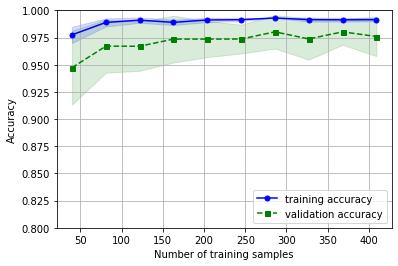

In [15]:
plt.plot(train_sizes,train_mean,color='blue',
        marker='o',
        markersize=5,
        label='training accuracy')
plt.fill_between(train_sizes,
                train_mean+train_std,
                train_mean-train_std,
                alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',
        marker='s',markersize=5,
        label='validation accuracy')
plt.fill_between(train_sizes,
                test_mean+test_std,
                test_mean-test_std,
                alpha=0.15,
                color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1])
plt.show()

Via the train_sizes parameter in the learning_curve function, we can control the absolute or relative number of training samples that are used to generate the learning curves. Here, we set train_sizes=np.linspace(0.1, 1.0, 10) to use 10 evenly spaced relative intervals for the training set sizes. By default, the learning_curve function uses stratified k-fold cross-validation to calculate the cross-validation accuracy, and we set 10 k = via the cv parameter. Then, we simply calculate the average accuracies from the returned cross-validated training and test scores for the different sizes of the training set, which we plotted using matplotlib's plot function. Furthermore, we add the standard deviation of the average accuracies to the plot using the fill_between function to indicate the variance of the estimate

**Addressing overfitting and under fiting with validation curves**

Validation curves are a useful tool for improving the performance of a model by addressing issues such as overfitting or underfitting. Validation curves are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we vary the values of the model parameters, for example, the inverse regularization parameter C in logistic regression. 

In [16]:
from sklearn.model_selection import validation_curve
param_range=[0.001,0.01,0.1,1,10,100]
train_scores,test_scores=validation_curve(estimator=pipe_lr,
                                         X=X_train,
                                         y=y_train,
                                         param_name='clf__C',
                                         param_range=param_range,
                                         cv=10)
train_mean_C=np.mean(train_scores,axis=1)
train_std_C=np.std(train_scores,axis=1)
test_mean_C=np.mean(test_scores,axis=1)
test_std_C=np.mean(test_scores,axis=1)
# train_scores.shape
test_mean_C.shape

C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\si

C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\si

(6,)

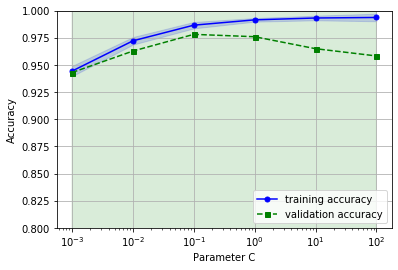

In [17]:
plt.plot(param_range,train_mean_C,
        color='blue',marker='o',
        markersize='5',
        label='training accuracy')
plt.fill_between(param_range,train_mean_C+train_std_C,
                train_mean_C-train_std_C,alpha=0.15,
                color='blue')
plt.plot(param_range,test_mean_C,color='green',linestyle='--',
        marker='s',markersize=5,
        label='validation accuracy')
plt.fill_between(param_range,
                test_mean_C+test_std_C,
                test_mean_C-test_std_C,
                alpha=0.15,color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8,1])
plt.show()

**Fine Tuning Machine Learning model via grid search**

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc=Pipeline([('scl', StandardScaler()),
                   ('clf',SVC(random_state=1))
                    ])

In [19]:
param_range=[0.0001,0.001,0.01,0.1,1,10,100,1000]
param_grid=[{'clf__C':param_range,
            'clf__kernel':['linear']},
            {'clf__C':param_range,
             'clf__gamma':param_range,
             'clf__kernel':['rbf']}]

In [20]:
gs=GridSearchCV(estimator=pipe_svc,
               param_grid=param_grid,
               scoring='accuracy',
               cv=10)

In [21]:
gs=gs.fit(X_train,y_train)
print(gs.best_score_)

0.978021978021978


C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [22]:
print(gs.best_params_)

{'clf__C': 0.1, 'clf__kernel': 'linear'}


Using the preceding code, we initialized a GridSearchCV object from the  sklearn.grid_search module to train and tune a support vector machine (SVM) pipeline. We set the param_grid parameter of GridSearchCV to a list of dictionaries to specify the parameters that we'd want to tune. For the linear SVM, we only evaluated the inverse regularization parameter C; for the RBF kernel SVM, we tuned both the C and gamma parameter. Note that the gamma parameter is specific to kernel SVMs. After we used the training data to perform the grid search, we obtained the score of the best-performing model via the best_score_ attribute and looked at its parameters, that can be accessed via the best_params_ attribute. In this particular case, the linear SVM model with 'clf__C'= 0.1' yielded the best k-fold crossvalidation accuracy: 97.8 percent.

In [23]:
clf=gs.best_estimator_
clf.fit(X_train,y_train)
print('Test accuracy: %.3f' % clf.score(X_test,y_test))

Test accuracy: 0.965


**Different Performance Evaluation Metrics**

**1. Precision, Recall, F1-Score**

In [24]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train,y_train)
y_pred=pipe_svc.predict(X_test)
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)
print(confmat)

[[40  2]
 [ 1 71]]


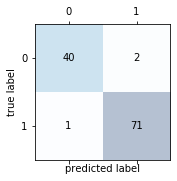

In [25]:
fig,ax=plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [26]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,f1_score
print('Precision: %.3f' % precision_score(y_test,y_pred))
print('Recall: %.3f' % recall_score(y_test,y_pred))
print('F1: %.3f' %f1_score(y_test,y_pred))

Precision: 0.973
Recall: 0.986
F1: 0.979


**2. Reciever Operating Characteristic**

Receiver operator characteristic (ROC) graphs are useful tools for selecting models for classification based on their performance with respect to the false positive and true positive rates, which are computed by shifting the decision threshold of the classifier. The diagonal of an ROC graph can be interpreted as random guessing, and classification models that fall below the diagonal are considered as worse than random guessing. A perfect classifier would fall into the top-left corner of the graph with a true positive rate of 1 and a false positive rate of 0. Based on the ROC curve, we can then compute the so-called area under the curve (AUC) to characterize the performance of a classification model.

In [32]:
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
X_train2=X_train[:,[4,14]]
cv=StratifiedKFold(n_splits=3,random_state=1)
print(X_train2.shape)

(455, 2)


In [ ]:
fig=plt.figure(figsize=(7,5))
mean_tpr=0
mean_tpr=np.linspace(0,1,100)
all_tpr=[]
for i.(train,test) in enumerate(cv.split(X_train,y_train)):
    probas=pipe_lr.fit